In [448]:
import warnings
warnings.filterwarnings('ignore')

In [449]:
import numpy as np
import pandas as pd
import math 
import itertools
import re
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [450]:
from sklearn.preprocessing import Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [451]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

In [452]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [453]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# import missingno as msno

In [454]:
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
# sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True

In [455]:
import os
print(os.listdir('../VINAY/Untitled Folder/'))

['links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'small_movies_b.csv', 'small_movies_R.csv', 'small_movies_W.csv', 'small_movies_X.csv', 'small_movies_Y.csv', 'small_movie_list.csv', 'tags.csv']


In [456]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
data_r = ratings.copy()
data_m = movies.copy()

In [457]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [458]:
print(ratings.shape)
ratings.drop(['timestamp'], axis=1, inplace=True)

(100836, 4)


In [459]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [460]:
ratings.mean()
# descriptive statistics of the data

userId       326.127564
movieId    19435.295718
rating         3.501557
dtype: float64

In [461]:
num_movies = ratings['movieId'].max()
num_movies

193609

In [462]:
num_users = ratings['userId'].max()
num_users

610

In [463]:
# Average ratings of movies is 3.5
# Total number of users in the dataset is 610
# Minimum rating is 0.5
# Maximum rating is 5.0

In [464]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [465]:
movies.shape

(9742, 3)

In [466]:
data_combined = pd.merge(ratings, movies, on='movieId')
data_combined.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [467]:
data_ratings = pd.DataFrame(data_combined.groupby('title')['rating'].mean())
data_ratings['total ratings'] = pd.DataFrame(data_combined.groupby('title')['rating'].count())
data_ratings.rename(columns = {'rating': 'mean ratings'}, inplace = True)
data_ratings.sort_values('total ratings',ascending = False).head(10)

# Made a table called data_ratings which has movies sorted according to highest number 
# of ratings and mean rating corresponding to that movie.

,mean ratings,total ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


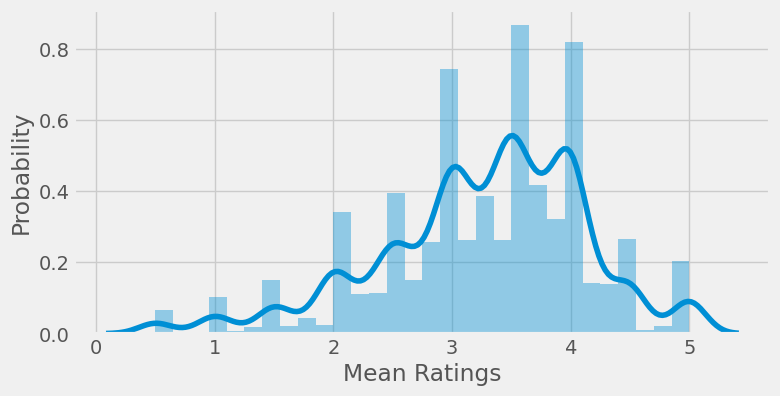

In [468]:
plt.figure(figsize=(8,4))
sns.distplot(data_ratings['mean ratings'], bins=30)
plt.xlabel('Mean Ratings')
plt.ylabel('Probability')
plt.show()

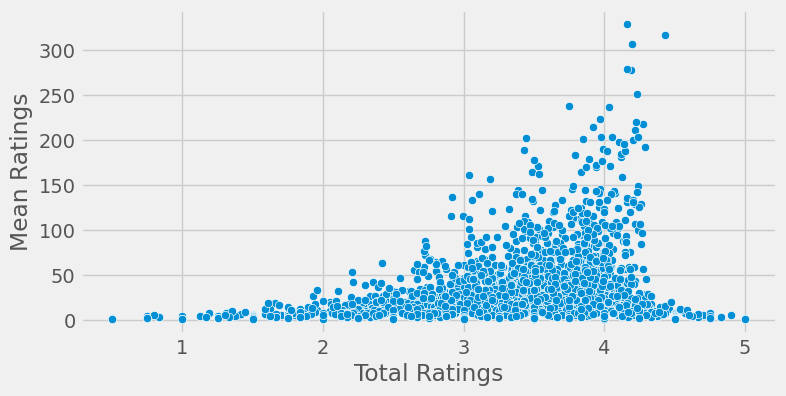

In [469]:
plt.figure(figsize=(8,4))
sns.scatterplot(y = data_ratings['total ratings'], x = data_ratings['mean ratings'])
plt.xlabel('Total Ratings')
plt.ylabel('Mean Ratings')
plt.show()

In [470]:
# Collabrative Filtering

In [471]:
# Creating a user-mvie matrix
user_movie = data_combined.pivot_table(index = 'userId', columns = 'title', values = 'rating')
user_movie.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [472]:
user_movie_mat = user_movie.copy()
user_movie_mat = user_movie_mat.apply(lambda row: row.fillna(row.mean()), axis=1)
user_movie_mat.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,...,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.000000,4.366379
2,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,...,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276
3,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,...,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,...,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556
5,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,...,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364


In [473]:
user_movie_mat.T.corr()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.264516e-03,5.525772e-04,0.048419,0.021847,-0.045497,-6.199672e-03,0.047013,1.950985e-02,-8.754088e-03,...,0.018127,-0.017172,-0.015221,-3.705875e-02,-2.912138e-02,0.012016,0.055261,0.075224,-2.571255e-02,0.010932
2,0.001265,1.000000e+00,-4.975816e-17,-0.017164,0.021796,-0.021051,-1.111357e-02,-0.048085,7.652805e-16,3.011629e-03,...,-0.050551,-0.031581,-0.001688,-1.265569e-15,-6.430371e-16,0.006226,-0.020504,-0.006001,-6.009100e-02,0.024999
3,0.000553,-4.975816e-17,1.000000e+00,-0.011260,-0.031539,0.004800,-2.587070e-16,-0.032471,-4.812885e-16,3.774064e-16,...,-0.004904,-0.016117,0.017749,-8.106536e-16,-1.430628e-03,-0.037289,-0.007789,-0.013001,-1.168878e-16,0.019550
4,0.048419,-1.716402e-02,-1.125978e-02,1.000000,-0.029620,0.013956,5.809139e-02,0.002065,-5.873603e-03,5.159032e-02,...,-0.037687,0.063122,0.027640,-1.378212e-02,4.003747e-02,0.020590,0.014628,-0.037569,-1.788358e-02,-0.000995
5,0.021847,2.179571e-02,-3.153892e-02,-0.029620,1.000000,0.009111,1.011715e-02,-0.012284,7.750436e-16,-3.316512e-02,...,0.015964,0.012427,0.027076,1.246135e-02,-3.627206e-02,0.026319,0.031896,-0.001751,9.382892e-02,-0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.012016,6.225827e-03,-3.728895e-02,0.020590,0.026319,-0.009137,2.832591e-02,0.022277,3.163273e-02,-3.994577e-02,...,0.053683,0.016384,0.098011,6.107833e-02,1.967830e-02,1.000000,0.017927,0.056676,3.842210e-02,0.075464
607,0.055261,-2.050374e-02,-7.789105e-03,0.014628,0.031896,0.045501,3.098070e-02,0.048822,-1.216061e-02,-1.765576e-02,...,0.049059,0.038197,0.049317,2.355180e-03,-2.938114e-02,0.017927,1.000000,0.044514,1.904919e-02,0.021860
608,0.075224,-6.000828e-03,-1.300064e-02,-0.037569,-0.001751,0.021727,2.841409e-02,0.071759,3.278284e-02,-5.199963e-02,...,0.069198,0.051388,0.012801,6.318649e-03,-7.977761e-03,0.056676,0.044514,1.000000,5.071449e-02,0.054454


In [474]:
user_correlation_mat = user_movie_mat.T.corr()

In [475]:
user_correlation_mat

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.264516e-03,5.525772e-04,0.048419,0.021847,-0.045497,-6.199672e-03,0.047013,1.950985e-02,-8.754088e-03,...,0.018127,-0.017172,-0.015221,-3.705875e-02,-2.912138e-02,0.012016,0.055261,0.075224,-2.571255e-02,0.010932
2,0.001265,1.000000e+00,-4.975816e-17,-0.017164,0.021796,-0.021051,-1.111357e-02,-0.048085,7.652805e-16,3.011629e-03,...,-0.050551,-0.031581,-0.001688,-1.265569e-15,-6.430371e-16,0.006226,-0.020504,-0.006001,-6.009100e-02,0.024999
3,0.000553,-4.975816e-17,1.000000e+00,-0.011260,-0.031539,0.004800,-2.587070e-16,-0.032471,-4.812885e-16,3.774064e-16,...,-0.004904,-0.016117,0.017749,-8.106536e-16,-1.430628e-03,-0.037289,-0.007789,-0.013001,-1.168878e-16,0.019550
4,0.048419,-1.716402e-02,-1.125978e-02,1.000000,-0.029620,0.013956,5.809139e-02,0.002065,-5.873603e-03,5.159032e-02,...,-0.037687,0.063122,0.027640,-1.378212e-02,4.003747e-02,0.020590,0.014628,-0.037569,-1.788358e-02,-0.000995
5,0.021847,2.179571e-02,-3.153892e-02,-0.029620,1.000000,0.009111,1.011715e-02,-0.012284,7.750436e-16,-3.316512e-02,...,0.015964,0.012427,0.027076,1.246135e-02,-3.627206e-02,0.026319,0.031896,-0.001751,9.382892e-02,-0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.012016,6.225827e-03,-3.728895e-02,0.020590,0.026319,-0.009137,2.832591e-02,0.022277,3.163273e-02,-3.994577e-02,...,0.053683,0.016384,0.098011,6.107833e-02,1.967830e-02,1.000000,0.017927,0.056676,3.842210e-02,0.075464
607,0.055261,-2.050374e-02,-7.789105e-03,0.014628,0.031896,0.045501,3.098070e-02,0.048822,-1.216061e-02,-1.765576e-02,...,0.049059,0.038197,0.049317,2.355180e-03,-2.938114e-02,0.017927,1.000000,0.044514,1.904919e-02,0.021860
608,0.075224,-6.000828e-03,-1.300064e-02,-0.037569,-0.001751,0.021727,2.841409e-02,0.071759,3.278284e-02,-5.199963e-02,...,0.069198,0.051388,0.012801,6.318649e-03,-7.977761e-03,0.056676,0.044514,1.000000,5.071449e-02,0.054454


In [476]:
user_reference = user_correlation_mat.iloc[0]

In [477]:
user_reference.sort_values(ascending=False, inplace=True)
user_reference

userId
1      1.000000
301    0.124799
597    0.102631
414    0.101348
477    0.099217
         ...   
71    -0.082932
370   -0.086678
501   -0.090018
579   -0.105003
53          NaN
Name: 1, Length: 610, dtype: float64

In [478]:
user_reference.dropna(inplace = True)

In [479]:
# other_correaltion_users = user

In [480]:
data_combined[data_combined['userId'] == 1]

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
267,1,6,4.0,Heat (1995),Action|Crime|Thriller
369,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
572,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
16056,1,3744,4.0,Shaft (2000),Action|Crime|Thriller
16075,1,3793,5.0,X-Men (2000),Action|Adventure|Sci-Fi
16208,1,3809,4.0,What About Bob? (1991),Comedy
16243,1,4006,4.0,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi


In [481]:
data_combined[(data_combined['userId'] == 1) & (data_combined['movieId'] == 32)]

,userId,movieId,rating,title,genres


In [482]:
# Hence movie 32 has not being rated by User 1

In [483]:
# Lets find what rating would user 1 give to movie 36 using our recommender system

In [484]:
print('32th Movie : ', movies['title'][ movies['movieId'] == 32 ].values)

32th Movie :  ['Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']


In [485]:
data_ratings.loc[['Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']]

,mean ratings,total ratings
title,,
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),3.983051,177


In [486]:
other_correlation_users = user_reference[1:610]
other_correlation_users

userId
301    0.124799
597    0.102631
414    0.101348
477    0.099217
57     0.099070
         ...   
395   -0.075800
71    -0.082932
370   -0.086678
501   -0.090018
579   -0.105003
Name: 1, Length: 608, dtype: float64

In [487]:
other_users = other_correlation_users.keys()

users_1 = list()
for user in other_users:
    if data_combined[ (data_combined['userId'] == user) & (data_combined['movieId'] == 9) ]['rating'].sum()  :
        users_1.append(user)


In [488]:
# Predicted rating = sum of [ (weights) * (ratings) ] / sum of (weights)

In [489]:
sum_similarity_1 = 0
weighted_ratings_1 = 0
for user in users_1:
    weighted_ratings_1 += other_correlation_users.loc[user] * data_combined[ (data_combined['userId'] == user) & 
                                                          (data_combined['movieId'] == 9) ]['rating'].sum()
    sum_similarity_1 += other_correlation_users.loc[user]
if(sum_similarity_1!=0):
    print("Predicted rating for movie 9 by user 1 :", weighted_ratings_1 / sum_similarity_1)
else:
    print("No similar users found")


Predicted rating for movie 9 by user 1 : 6.139675481574331


In [490]:
# Hence the user 1 would rate the movie 32 with a rating of 4.04

In [491]:
unrated_user_reference = []
for movie in range(1, 200):
    if data_combined[(data_combined['userId'] == 1) & (data_combined['movieId'] == movie)]['rating'].sum() == 0:
        unrated_user_reference.append(movie)

print(unrated_user_reference)

[2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


In [492]:
def predict_rating(movie_no):
    sum_similarity = 0
    weighted_ratings = 0
    for user in users:
        weighted_ratings += other_correlation_users.loc[user] * data_combined[ (data_combined['userId'] == user) & 
                                                              (data_combined['movieId'] == movie_no) ]['rating'].sum()
        sum_similarity += other_correlation_users.loc[user]
    if(sum_similarity!=0):
        print("Predicted rating for movie", movie_no, "by user 1 :", weighted_ratings / sum_similarity)
    else:
        print("No similar users found")


In [493]:
other_users = other_correlation_users.keys()

for movie_no in unrated_user_reference:
    count = 0
    users = list()
    for user in other_users:
        if data_combined[ (data_combined['userId'] == user) & (data_combined['movieId'] == movie_no) ]['rating'].sum()  :
            users.append(user)
            count += 1
    print(predict_rating(movie_no), ": Users that rated movie ", movie_no, ": ", count)

Predicted rating for movie 2 by user 1 : 2.990560156764658
None : Users that rated movie  2 :  110
Predicted rating for movie 4 by user 1 : 0.3615347428599964
None : Users that rated movie  4 :  7
Predicted rating for movie 5 by user 1 : 2.455668059926038
None : Users that rated movie  5 :  49
Predicted rating for movie 7 by user 1 : 2.9136751757847925
None : Users that rated movie  7 :  54
Predicted rating for movie 8 by user 1 : 1.9751322129702373
None : Users that rated movie  8 :  8
Predicted rating for movie 9 by user 1 : 6.139675481574331
None : Users that rated movie  9 :  16
Predicted rating for movie 10 by user 1 : 3.255072520796546
None : Users that rated movie  10 :  132
Predicted rating for movie 11 by user 1 : 3.5564107335587676
None : Users that rated movie  11 :  70
Predicted rating for movie 12 by user 1 : 2.002832191610991
None : Users that rated movie  12 :  19
Predicted rating for movie 13 by user 1 : 3.1050774343647554
None : Users that rated movie  13 :  8
Predicte